In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bihc

# Plot parameters [OPTIONAL]
import matplotlib as mpl
import scienceplots

plt.style.use(['science','ieee', 'no-latex'])
mpl.rcParams['figure.dpi'] = 160
mpl.rcParams['font.size'] = 16

%matplotlib inline

## Beam generation

In [2]:
# User defined filling scheme
def fillingSchemeSPS(nbunches=72, ntrains=4):
    '''
    Returns the filling scheme for the SPS

    Parameters
    ----------
    ntrains: number of injections (batches)
    '''
    # Define filling scheme: parameters
    #ntrains = 4 # number of trains/batches
    nslots = 924 # Defining total number of slots for SPS
    #nbunches = 72 # Defining a number of bunchs e.g. 18, 36, 72.. 
    batchspacing = 9 # Batch spacing in 25 ns slots 45/5

    # Defining the trains as lists of True/Falses
    bt = [True]*nbunches
    st = [False]*batchspacing
    sc = [False]*(nslots - (nbunches+batchspacing)*ntrains)
    an = (bt + st)*ntrains + sc

    return an

### SPS operational beam (LHC3 as of 2025)
* Used to fill the LHC
* 4 trains of 36 bunches
* Intensity per bunch: 1.8e11 ppb (max)
* bunch length: 1.65 ns +- 10% @ Flat top energy
* Shape: gaussian or q-gaussian (q~1)

In [3]:
# Beam of typical OPERATIONAL
fillingScheme = fillingSchemeSPS(nbunches=36, ntrains=4)
bl = 1.65e-9                 # bunch length [s]
Np = 1.8e11                  # bunch intensity [protons/bunch]
bunchShape = 'q-GAUSSIAN'    # bunch profile shape in time 
qvalue = 0.95                # value of q parameter in the q-gaussian distribution
fillMode = 'FLATTOP'         # Energy
fmax = 3.5e9                  # Maximum frequency of the beam spectrum [Hz]

beam_op = bihc.Beam(Np=Np, bunchLength=bl, fillingScheme=fillingScheme,
                bunchShape=bunchShape, qvalue=qvalue, 
                machine='SPS', fillMode=fillMode, spectrum='numeric', fmax=fmax)
Nb_op = Np*sum(fillingScheme)

Setting custom beam from filling scheme
Elaborating Data...


### SPS Standard (LHC25ns)
* Used during High Intensity studies (MDs)
* 4 trains of 72 bunches (standard variant)
* Intensity per bunch: 2.3e11 ppb
* bunch length: 1.65 ns +- 10% @ Flat top energy
* Shape: q-gaussian (q<1)

In [4]:
# Beam of typical OPERATIONAL
fillingScheme = fillingSchemeSPS(nbunches=72, ntrains=4)
bl = 1.6e-9                 # bunch length [s]
Np = 2.3e11                  # bunch intensity [protons/bunch]
bunchShape = 'q-GAUSSIAN'    # bunch profile shape in time 
qvalue = 0.9                # value of q parameter in the q-gaussian distribution
fillMode = 'FLATTOP'         # Energy
fmax = 3.5e9                  # Maximum frequency of the beam spectrum [Hz]

beam_lhc25 = bihc.Beam(Np=Np, bunchLength=bl, fillingScheme=fillingScheme,
                bunchShape=bunchShape, qvalue=qvalue, 
                machine='SPS', fillMode=fillMode, spectrum='numeric', fmax=fmax)

Nb_lhc25 = Np*sum(fillingScheme)

Setting custom beam from filling scheme
Elaborating Data...


### SPS Awake 
* Single bunch
* Intensity per bunch: 3e11 (2025) -> 4e11 after LS3
* bunch length:
  * 4 ns @ injection, shape gaussian
  * 1.5 ns @ flat top without bunch rotation, shape q-gaussian (q<1)
  * 0.8 ns @ flat top after bunch rotation, shape parabolic or q-gaussian with low q

In [5]:
# Beam before rotation (extraction)
fillingScheme = fillingSchemeSPS(nbunches=1, ntrains=1)
bl = 1.5e-9                # bunch length [s]
Np = 4e11                  # bunch intensity [protons/bunch]
bunchShape = 'q-GAUSSIAN'    # bunch profile shape in time 
qvalue = 0.85                  # value of q parameter in the q-gaussian distribution
fillMode = 'FLATTOP'        # Energy
fmax = 3.5e9                  # Maximum frequency of the beam powerpowerpowerpowerSpectrum [Hz]

beam_aw = bihc.Beam(Np=Np, bunchLength=bl, fillingScheme=fillingScheme,
                bunchShape=bunchShape, qvalue=qvalue, 
                machine='SPS', fillMode=fillMode, spectrum='numeric', fmax=fmax)

Nb_aw = Np*sum(fillingScheme)

Setting custom beam from filling scheme
Elaborating Data...


In [6]:
# Beam after rotation (extraction)
fillingScheme = fillingSchemeSPS(nbunches=1, ntrains=1)
bl = 0.8e-9                # bunch length [s]
Np = 4e11                  # bunch intensity [protons/bunch]
bunchShape = 'q-GAUSSIAN'    # bunch profile shape in time 
qvalue = 0.6                  # value of q parameter in the q-gaussian distribution
fillMode = 'FLATTOP'        # Energy
fmax = 3.5e9                  # Maximum frequency of the beam powerpowerpowerpowerpowerpowerpowerpowerpowerSpectrum [Hz]

beam_aw_ex = bihc.Beam(Np=Np, bunchLength=bl, fillingScheme=fillingScheme,
                bunchShape=bunchShape, qvalue=qvalue, 
                machine='SPS', fillMode=fillMode, spectrum='numeric', fmax=fmax)

Nb_aw_ex = Np*sum(fillingScheme)

Setting custom beam from filling scheme
Elaborating Data...


### SPS SFTPRO beams
* 4200 bunches in 5ns slots
* Intensity per bunch: 1e10 ppb (2022) -> 11.91e9 ppb (after LS3)
  * Total intensity: 4.2e13 p (2022)m 5e13 p (after LS3)
* Bunch length: 1 ns @ flat top energy, shape parabolic or q-gaussian with low q     

In [7]:
# Beam SFTPRO filling scheme: generated from measurement using SPS FBCT
import datascout as ds # check docs for installation through acc-py

data = ds.parquet_to_dict('notebooks/data/SFTPRO_2024.10.11.12.01.04.900505.parquet')['SPS.BCTW.31931/Acquisition']['value'] # from HI SFTPRO MD
cycle_intensities = data['bunchIntensity']

Np = 1.91e10 # post-LS3 target intensity

inty = cycle_intensities[10, :]
intensities_SFTPRO = inty + np.roll(inty, int((2100+210)/5)) # 2 batches
intensities_SFTPRO *= Np/np.mean(intensities_SFTPRO)         # changing mean intensity to target
intensities_SFTPRO = np.interp(np.arange(0, len(inty), 1/5), np.arange(0, len(inty)), intensities_SFTPRO) # interpolate to SPS slots

In [8]:
fillingScheme = intensities_SFTPRO > 1e9
bl = 1.e-9                 # bunch length [s]
Np = intensities_SFTPRO      # bunch intensity [protons/bunch]
bunchShape = 'q-GAUSSIAN'    # bunch profile shape in time 
qvalue = 1                  # value of q parameter in the q-gaussian distribution
fillMode = 'FLATTOP'        # Energy
fmax = 3.5e9                  # Maximum frequency of the beam powerpowerSpectrum [Hz]

beam_sftpro = bihc.Beam(Np=Np, bunchLength=bl, fillingScheme=fillingScheme,
                bunchShape=bunchShape, qvalue=qvalue, 
                machine='SPS-SFTPRO', fillMode=fillMode, spectrum='numeric', fmax=fmax)

Nb_sftpro = beam_sftpro.Np*sum(fillingScheme)

Setting custom beam from filling scheme
Elaborating Data...


## Plot spectrums

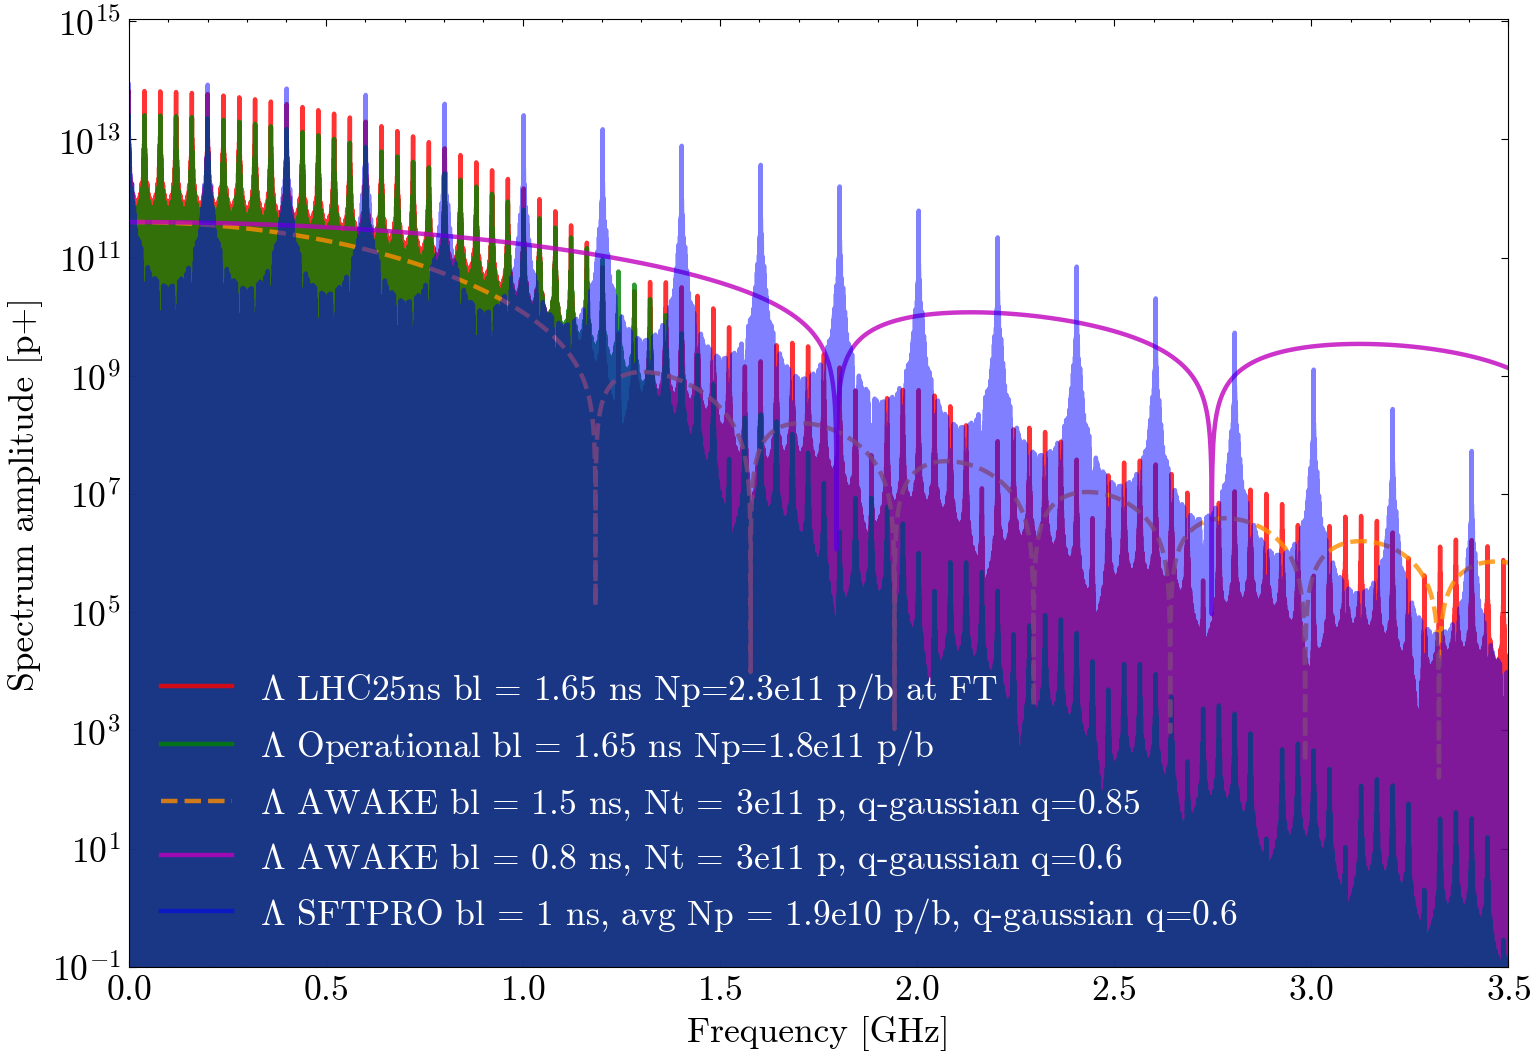

In [ ]:
#         Plots
# ----------------------
# Plot impedance and spectrum 
fig, ax = plt.subplots(figsize=[10,7])

l0, = ax.plot(beam_lhc25.spectrum[0]/1e9, beam_lhc25.spectrum[1]*Nb_lhc25, color='r', lw=2, alpha=0.8)
l1, = ax.plot(beam_op.spectrum[0]/1e9, beam_op.spectrum[1]*Nb_op, color='g', lw=2, ls='-', alpha=0.8)
l2, = ax.plot(beam_aw.spectrum[0]/1e9, beam_aw.spectrum[1]*Nb_aw, color='darkorange', lw=2, ls='--', alpha=0.8)
l3, = ax.plot(beam_aw_ex.spectrum[0]/1e9, beam_aw_ex.spectrum[1]*Nb_aw_ex, color='m', lw=2, ls='-', alpha=0.8)
l4, = ax.plot(beam_sftpro.spectrum[0]/1e9, beam_sftpro.spectrum[1]*Nb_sftpro, color='b', lw=2, ls='-', alpha=0.5)

ax.set_ylabel('Spectrum amplitude [p+]')
ax.set_yscale('log')
ax.set_xlabel('Frequency [GHz]')
ax.set_xlim((0, fmax/1e9))
ax.set_ylim(ymin=1)

ax.legend([l0, l1, l2, l3, l4], [f'$\Lambda$ LHC25ns bl = 1.65 ns Np=2.3e11 p/b at FT', 
                         '$\Lambda$ Operational bl = 1.65 ns Np=1.8e11 p/b ', 
                         '$\Lambda$ AWAKE bl = 1.5 ns, Nt = 3e11 p, q-gaussian q=0.85',
                         '$\Lambda$ AWAKE bl = 0.8 ns, Nt = 3e11 p, q-gaussian q=0.6',
                         '$\Lambda$ SFTPRO bl = 1 ns, avg Np = 1.9e10 p/b, q-gaussian q=0.6'], 
                         loc=0, labelcolor='white')

fig.tight_layout()

## Power spectrum of all beams

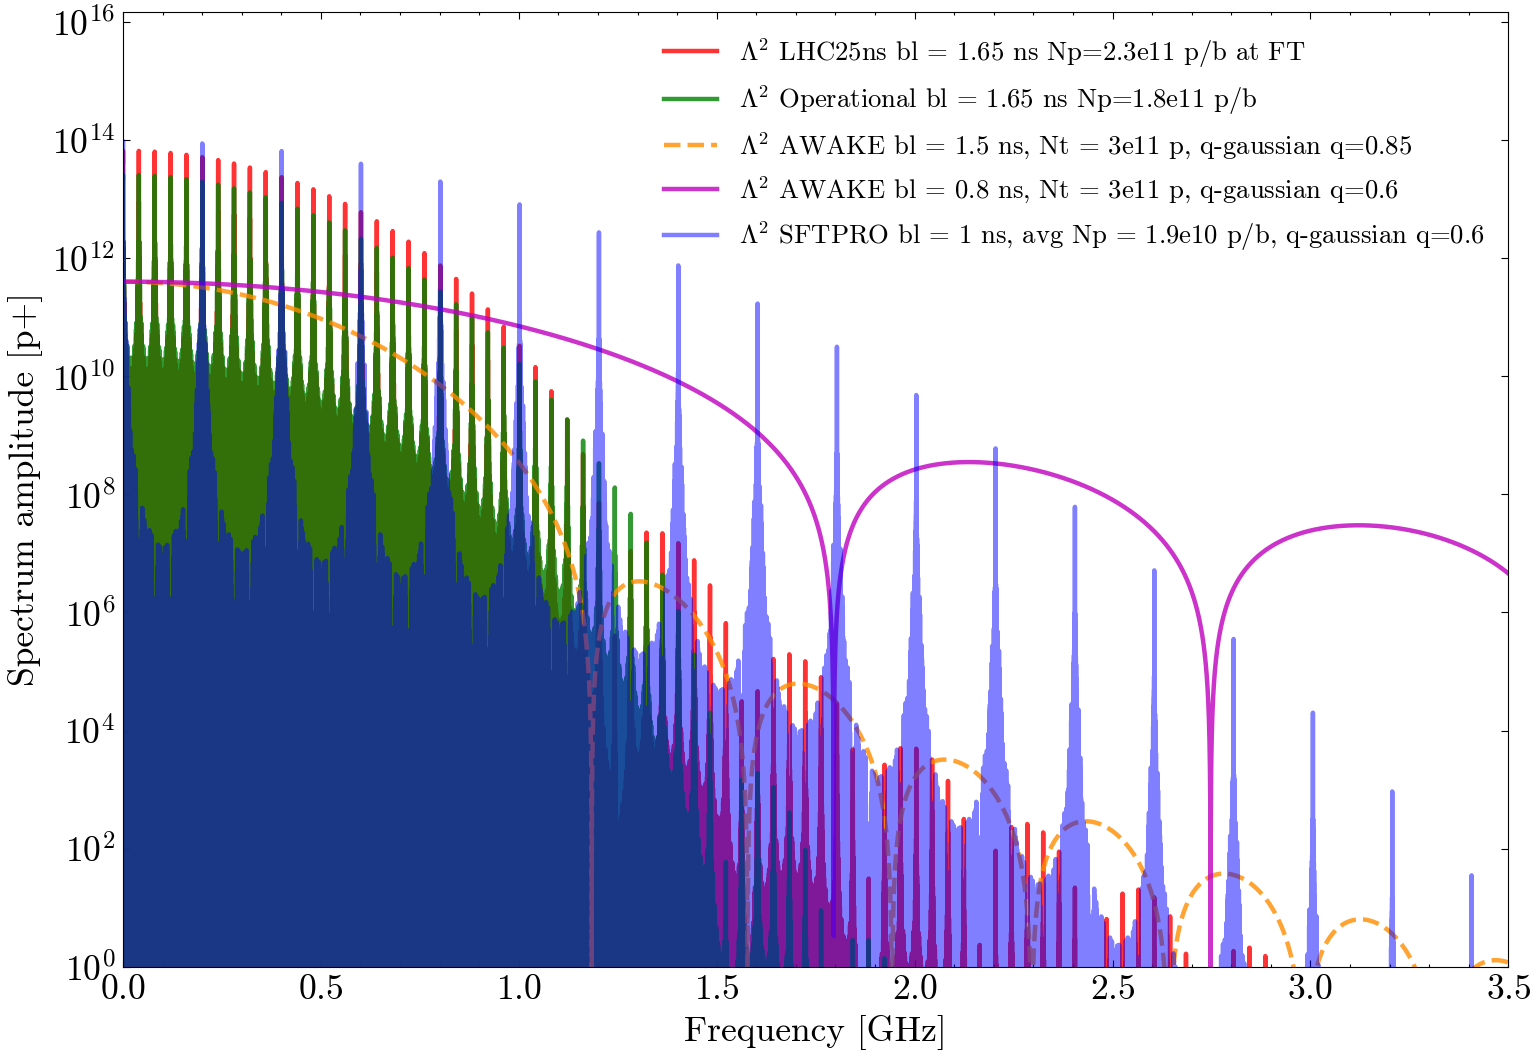

In [14]:
#         Plots
# ----------------------
# Plot impedance and spectrum 
fig, ax = plt.subplots(figsize=[10,7])

l0, = ax.plot(beam_lhc25.powerSpectrum[0]/1e9, beam_lhc25.powerSpectrum[1]*Nb_lhc25, color='r', lw=2, alpha=0.8)
l1, = ax.plot(beam_op.powerSpectrum[0]/1e9, beam_op.powerSpectrum[1]*Nb_op, color='g', lw=2, ls='-', alpha=0.8)
l2, = ax.plot(beam_aw.powerSpectrum[0]/1e9, beam_aw.powerSpectrum[1]*Nb_aw, color='darkorange', lw=2, ls='--', alpha=0.8)
l3, = ax.plot(beam_aw_ex.powerSpectrum[0]/1e9, beam_aw_ex.powerSpectrum[1]*Nb_aw_ex, color='m', lw=2, ls='-', alpha=0.8)
l4, = ax.plot(beam_sftpro.powerSpectrum[0]/1e9, beam_sftpro.powerSpectrum[1]*Nb_sftpro, color='b', lw=2, ls='-', alpha=0.5)

ax.set_ylabel('Spectrum amplitude [p+]')
ax.set_yscale('log')
ax.set_xlabel('Frequency [GHz]')
ax.set_xlim((0, fmax/1e9))
ax.set_ylim(ymin=1) #ymax=1.1)

ax.legend([l0, l1, l2, l3, l4], [f'$\Lambda^2$ LHC25ns bl = 1.65 ns Np=2.3e11 p/b at FT', 
                         '$\Lambda^2$ Operational bl = 1.65 ns Np=1.8e11 p/b ', 
                         '$\Lambda^2$ AWAKE bl = 1.5 ns, Nt = 3e11 p, q-gaussian q=0.85',
                         '$\Lambda^2$ AWAKE bl = 0.8 ns, Nt = 3e11 p, q-gaussian q=0.6',
                         '$\Lambda^2$ SFTPRO bl = 1 ns, avg Np = 1.9e10 p/b, q-gaussian q=0.6'], 
                         loc=0, labelcolor='black', fontsize=12)

fig.tight_layout()

## Adding impedance

(0.0, 3500000000.0)

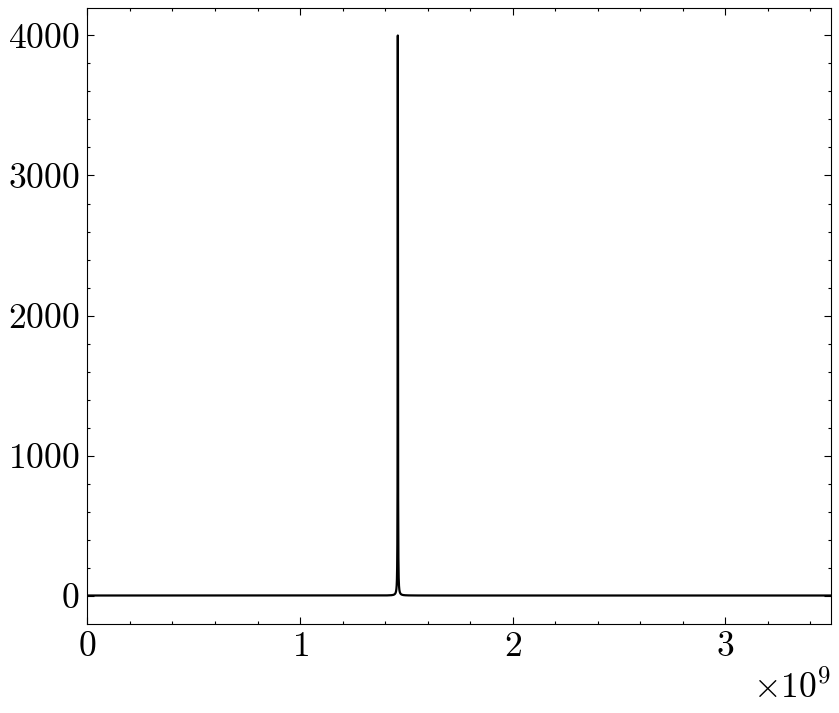

In [15]:
# Using resonator at 1.46 GHz
Z = bihc.Impedance(beam_lhc25.spectrum[0])
Z.getResonatorImpedance(4e3,1e3,1.46e9)

plt.close()
plt.figure(dpi=160, figsize=[6, 5])
plt.plot(Z.f, Z.Zr)
plt.xlim(0, 3.5e9)

In [16]:
#------- Ploss calculation with LHC25----------
print('Ploss with LHC25NS flattop')
print('-----------------')
# Get unshifted ploss 
ploss, ploss_density = beam_lhc25.getPloss(Z) 
print(f'Dissipated power (no-shift): {ploss} W')

# Get min/max power loss with rigid shift
shift = 40e6  # distance between shift steps [Hz]
shifts, power = beam_lhc25.getShiftedPloss(Z, shift=shift)

print(f'Minimum dissipated power: P_min = {np.min(power)} W, at step {shifts[np.argmin(power)]}')
print(f'Maximum dissipated power: P_max = {np.max(power)} W, at step {shifts[np.argmax(power)]}')
print(f'Average dissipated power: P_mean = {np.mean(power)} W')

# Get unshifted ploss max
ploss_max, ploss_density_max = beam_lhc25.getPloss(beam_lhc25.Zmax) 

Ploss with LHC25NS flattop
-----------------
Dissipated power (no-shift): 0.0021333119596176355 W


Computing scan: 100%|██████████| 1844/1844 [00:03<00:00, 476.37it/s]

Minimum dissipated power: P_min = 0.0016402997692514306 W, at step 921
Maximum dissipated power: P_max = 0.0029637225099304813 W, at step -393
Average dissipated power: P_mean = 0.0021778543405762637 W


In [17]:
#------- Ploss calculation after bunch rotation ----------
print('Ploss with AWAKE before bunch rotation')
print('-----------------')
# Get unshifted ploss 
ploss_aw, ploss_density_aw = beam_aw.getPloss(Z) 
print(f'Dissipated power (no-shift): {ploss_aw} W')

# Get min/max power loss with rigid shift
shift = 40e6  # distance between shift steps [Hz]
shifts, power_aw = beam_aw.getShiftedPloss(Z, shift=shift)

print(f'Minimum dissipated power: P_min = {np.min(power_aw)} W, at step {shifts[np.argmin(power_aw)]}')
print(f'Maximum dissipated power: P_max = {np.max(power_aw)} W, at step {shifts[np.argmax(power_aw)]}')
print(f'Average dissipated power: P_mean = {np.mean(power_aw)} W')

# Get unshifted ploss max
ploss_max_aw, ploss_density_max_aw = beam_aw.getPloss(beam_aw.Zmax) 

Ploss with AWAKE before bunch rotation
-----------------
Dissipated power (no-shift): 3.2252639940890984e-05 W


Computing scan: 100%|██████████| 1844/1844 [00:03<00:00, 469.41it/s]


Minimum dissipated power: P_min = 2.2817099463146434e-05 W, at step 921
Maximum dissipated power: P_max = 4.542165227511339e-05 W, at step -922
Average dissipated power: P_mean = 3.288459931596569e-05 W


In [18]:
#------- Ploss calculation after bunch rotation ----------
print('Ploss with AWAKE after bunch rotation')
print('-----------------')
# Get unshifted ploss 
ploss_ex, ploss_density_ex = beam_aw_ex.getPloss(Z) 
print(f'Dissipated power (no-shift): {ploss_ex} W')

# Get min/max power loss with rigid shift
shift = 40e6  # distance between shift steps [Hz]
shifts, power_ex = beam_aw_ex.getShiftedPloss(Z, shift=shift)

print(f'Minimum dissipated power: P_min = {np.min(power_ex)} W, at step {shifts[np.argmin(power_ex)]}')
print(f'Maximum dissipated power: P_max = {np.max(power_ex)} W, at step {shifts[np.argmax(power_ex)]}')
print(f'Average dissipated power: P_mean = {np.mean(power_ex)} W')

# Get unshifted ploss max
ploss_max_ex, ploss_density_max_ex = beam_aw_ex.getPloss(beam_aw_ex.Zmax) 

Ploss with AWAKE after bunch rotation
-----------------
Dissipated power (no-shift): 0.043104039630104556 W


Computing scan: 100%|██████████| 1844/1844 [00:03<00:00, 480.88it/s]

Minimum dissipated power: P_min = 0.03009995544000536 W, at step 921
Maximum dissipated power: P_max = 0.0597397149761885 W, at step -922
Average dissipated power: P_mean = 0.04371513875492067 W


In [19]:
print('Ploss with OPERATIONAL')
print('-----------------')
# Get unshifted ploss 
ploss_op, ploss_density_op = beam_op.getPloss(Z) 
print(f'Dissipated power (no-shift): {ploss_op} W')

# Get min/max power loss with rigid shift
shift = 40e6  # distance between shift steps [Hz]
shifts, power_op = beam_op.getShiftedPloss(Z, shift=shift)

print(f'Minimum dissipated power: P_min = {np.min(power_op)} W, at step {shifts[np.argmin(power_op)]}')
print(f'Maximum dissipated power: P_max = {np.max(power_op)} W, at step {shifts[np.argmax(power_op)]}')
print(f'Average dissipated power: P_mean = {np.mean(power_op)} W')

# Get unshifted ploss max
ploss_max_op, ploss_density_max_op = beam_op.getPloss(beam_op.Zmax) 

Ploss with OPERATIONAL
-----------------
Dissipated power (no-shift): 0.000616842429053565 W


Computing scan: 100%|██████████| 1844/1844 [00:03<00:00, 473.03it/s]

Minimum dissipated power: P_min = 0.00047311234677904404 W, at step 921
Maximum dissipated power: P_max = 0.0007973455331656987 W, at step -922
Average dissipated power: P_mean = 0.0006233946750055085 W


In [20]:
print('Ploss with SFTPRO')
print('-----------------')
# Get unshifted ploss 
ploss_sftpro, ploss_density_sftpro = beam_sftpro.getPloss(Z) 
print(f'Dissipated power (no-shift): {ploss_sftpro} W')

# Get min/max power loss with rigid shift
shift = 40e6  # distance between shift steps [Hz]
shifts, power_sftpro = beam_sftpro.getShiftedPloss(Z, shift=shift)

print(f'Minimum dissipated power: P_min = {np.min(power_sftpro)} W, at step {shifts[np.argmin(power_sftpro)]}')
print(f'Maximum dissipated power: P_max = {np.max(power_sftpro)} W, at step {shifts[np.argmax(power_sftpro)]}')
print(f'Average dissipated power: P_mean = {np.mean(power_sftpro)} W')

# Get unshifted ploss max
ploss_max_sftpro, ploss_density_max_sftpro = beam_sftpro.getPloss(beam_sftpro.Zmax) 

Ploss with SFTPRO
-----------------
Dissipated power (no-shift): 0.006918415220550545 W


Computing scan: 100%|██████████| 1844/1844 [00:24<00:00, 73.89it/s]

Minimum dissipated power: P_min = 0.0036366513055825123 W, at step 921
Maximum dissipated power: P_max = 0.055069607127063665 W, at step -922
Average dissipated power: P_mean = 0.011461004851306631 W


### Plot Power loss by frequency results:

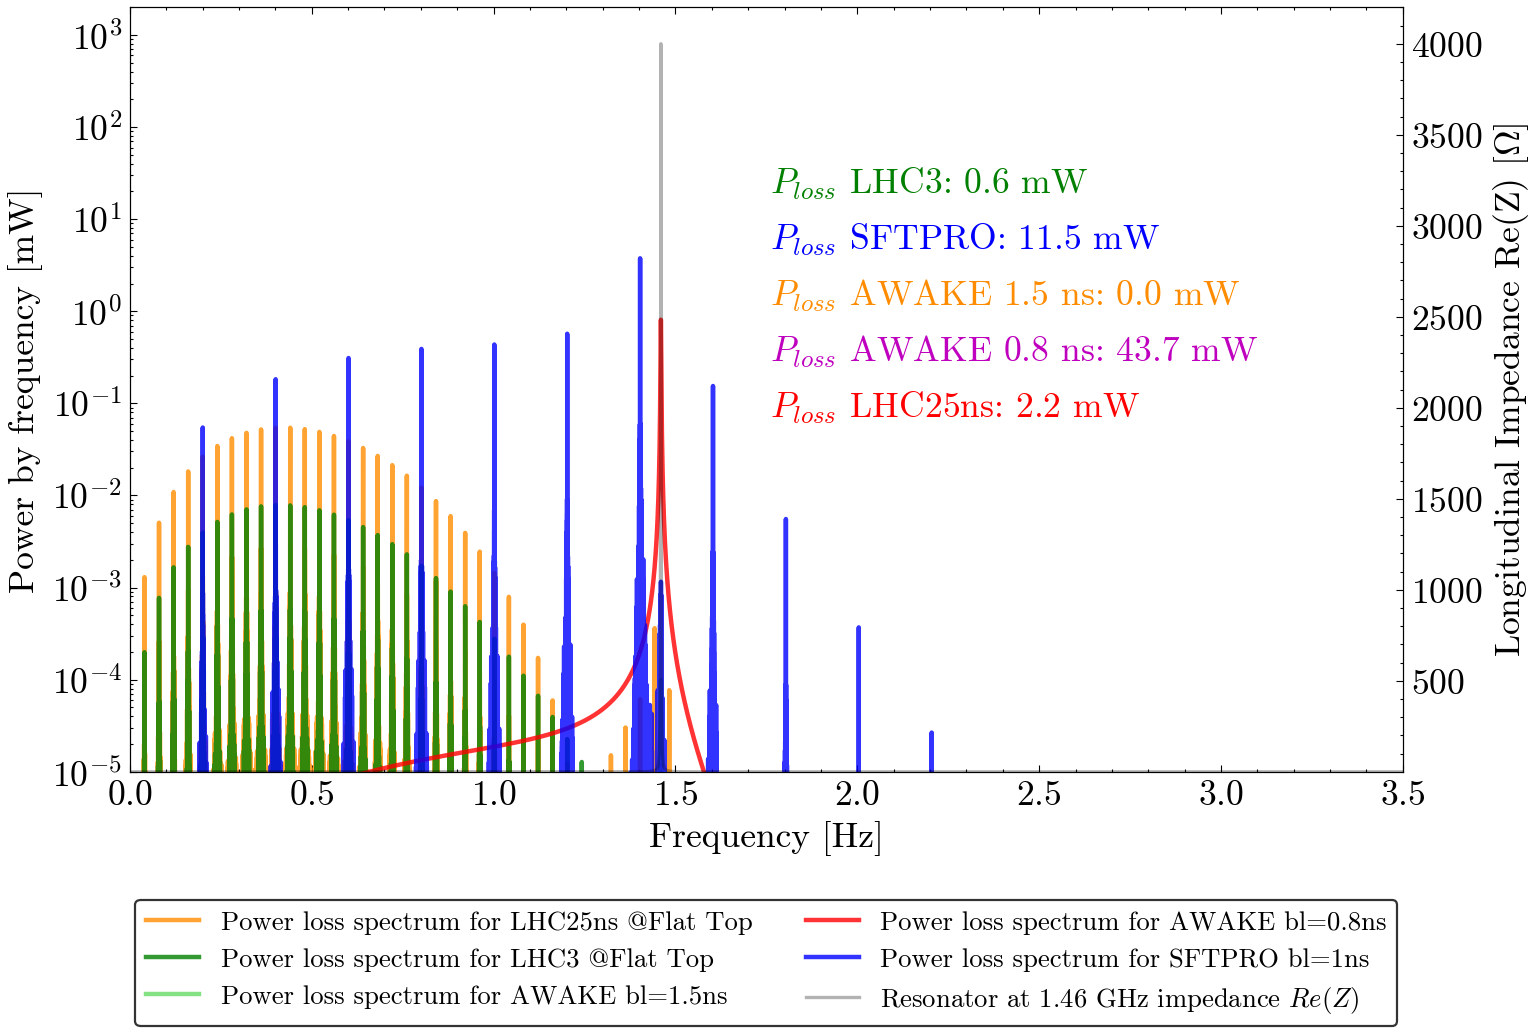

In [24]:
%matplotlib inline
#         Plots
# ----------------------
# Plot impedance and spectrum 
fig, ax = plt.subplots(figsize=[10,7])
axx = ax.twinx()

l0, = ax.plot(np.linspace(0, Z.f.max(), len(ploss_density))/1e9, ploss_density*1e3, color='darkorange', lw=2, alpha=0.8)
l1, = ax.plot(np.linspace(0, Z.f.max(), len(ploss_density_op))/1e9, ploss_density_op*1e3, color='g', lw=2, ls='-', alpha=0.8)
l2, = ax.plot(np.linspace(0, Z.f.max(), len(ploss_density_aw))/1e9, ploss_density_aw*1e3, color='limegreen', lw=2, ls='-', alpha=0.6)
l3, = ax.plot(np.linspace(0, Z.f.max(), len(ploss_density_ex))/1e9, ploss_density_ex*1e3, color='r', lw=2, ls='-', alpha=0.8)
l4, = ax.plot(np.linspace(0, Z.f.max(), len(ploss_density_sftpro))/1e9, ploss_density_sftpro*1e3, color='b', lw=2, ls='-', alpha=0.8)

ax.set_ylabel('Power by frequency [mW]', color='k')
ax.set_yscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_xlim((0, fmax/1e9))
ax.set_ylim(ymin=1e-5, ymax=2*1000)

l00, = axx.plot(Z.f/1e9, Z.Zr, color='k', alpha=0.3, lw=1.5)
axx.set_ylabel(r'Longitudinal Impedance Re(Z) [$\Omega$]', color='k')
axx.set_ylim(ymin=1e-0, ymax=4200)
#axx.set_yscale('log')
axx.legend([l0, l1, l2, l3, l4, l00], [f'Power loss spectrum for LHC25ns @Flat Top', 
                          'Power loss spectrum for LHC3 @Flat Top', 
                          'Power loss spectrum for AWAKE bl=1.5ns', 
                          'Power loss spectrum for AWAKE bl=0.8ns',
                          'Power loss spectrum for SFTPRO bl=1ns',
                          'Resonator at 1.46 GHz impedance $Re(Z)$'], 
                           loc='center', bbox_to_anchor=(0.5, -0.25), ncol=2,
                           frameon=True, edgecolor='k', fontsize=12)
'''
fig.text(0.5, 0.8, r'$P_{loss}$ LHC3: '+f'{round(np.mean(power_op),1)} W', color='green')
fig.text(0.5, 0.75, r'$P_{loss}$ SFTPRO: '+f'{round(np.mean(power_sftpro),1)} W', color='blue')
fig.text(0.5, 0.7, r'$P_{loss}$ AWAKE 1.5 ns: '+f'{round(np.mean(power_aw), 1)} W', color='limegreen')
fig.text(0.5, 0.65, r'$P_{loss}$ AWAKE 0.7 ns: '+f'{round(np.mean(power_ex), 1)} W', color='red')
fig.text(0.5, 0.6, r'$P_{loss}$ LHC25ns: '+f'{round(np.mean(power),1)} W', color='darkorange')
fig.savefig('Ploss_AWAKEvsLHC25nsvsLHC3.png')
'''

fig.text(0.5, 0.8, r'$P_{loss}$ LHC3: '+f'{round(np.mean(power_op)*1e3,1)} mW', color='green')
fig.text(0.5, 0.75, r'$P_{loss}$ SFTPRO: '+f'{round(np.mean(power_sftpro)*1e3,1)} mW', color='blue')
fig.text(0.5, 0.7, r'$P_{loss}$ AWAKE 1.5 ns: '+f'{round(np.mean(power_aw)*1e3, 1)} mW', color='darkorange')
fig.text(0.5, 0.65, r'$P_{loss}$ AWAKE 0.8 ns: '+f'{round(np.mean(power_ex)*1e3, 1)} mW', color='m')
fig.text(0.5, 0.6, r'$P_{loss}$ LHC25ns: '+f'{round(np.mean(power)*1e3,1)} mW', color='r')

fig.tight_layout()
#fig.savefig('Ploss_SPSbeams_GHzResonance.png')